<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

import os
import re

from functools import reduce 
from collections import defaultdict

# Customer Analysis

In [3]:
os.listdir()

['.config',
 '1_customers_dataset.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 '1_order_payments_dataset.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'sample-sales-data.csv',
 'groceries.csv',
 'mock_sales_data.csv',
 'sales.csv',
 'online_retail_II.xlsx',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'sample_data']

In [7]:
df = pd.read_excel( 'online_retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower() for a in df.columns]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')] 
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.invoice_date = df.invoice_date.to_numpy().astype('datetime64[ns]')
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.quantity * df.unit_price
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country,date,week,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-11-29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-11-29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-11-29,20.34


In [14]:
df = df.groupby(['customerid', 'date', 'week'])['rev'].sum().reset_index().rename(columns = {'customerid':'id'})
df.head()

,id,date,week,rev
0,12346.0,2011-01-18,2011-01-17,77183.60
1,12747.0,2010-12-05,2010-11-29,358.56
2,12747.0,2010-12-13,2010-12-13,347.71
3,12747.0,2011-01-20,2011-01-17,303.04
4,12747.0,2011-03-01,2011-02-28,310.78


In [15]:
df2 = df.groupby(['id','week'])['rev'].sum().reset_index().sort_values(['id','week'])
df2.head()

,id,week,rev
0,12346.0,2011-01-17,77183.60
1,12747.0,2010-11-29,358.56
2,12747.0,2010-12-13,347.71
3,12747.0,2011-01-17,303.04
4,12747.0,2011-02-28,310.78


In [18]:
list_npu = df2.groupby(['id']).head(1)
list_pu = df2.groupby(['id','week']).head(1)
list_week = df2['week'].sort_values().unique()

In [30]:
#weeks = list_week[0]

res = list()

for weeks in list_week :
  temp_npu = list_npu[list_npu['week'] == weeks]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['week'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp['npu_week'] = np.repeat(weeks, len(temp))  
  temp['num'] = (temp['week'] - temp['npu_week']).dt.days // 7
  temp['ratio'] = round(temp['pu']/temp['pu'].max() * 100, 2)
  temp['npu_week'] = temp['npu_week'].astype(str)
  temp = temp[['npu_week', 'num', 'pu', 'ratio']]
  res.append(temp)

res = pd.concat(res)
res.head()


,npu_week,num,pu,ratio
0,2010-11-29,0,278,100.00
1,2010-11-29,1,58,20.86
2,2010-11-29,2,67,24.10
3,2010-11-29,3,19,6.83
4,2010-11-29,5,56,20.14


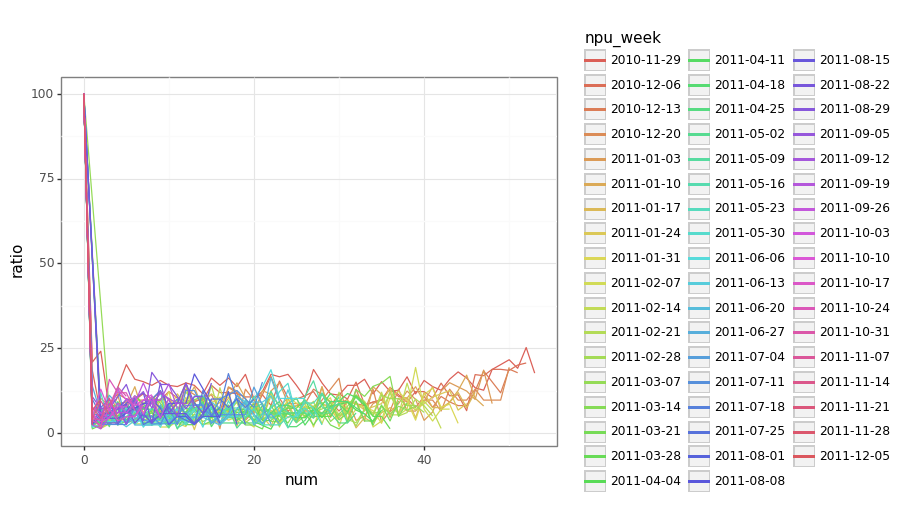

<ggplot: (8759379052285)>

In [31]:
(
    ggplot(res, aes('num', 'ratio', color = 'npu_week')) +
    gg.geom_line() +
    gg.theme_bw()
)

# Iterator

In [36]:
names = np.random.choice(['park', 'kim', 'jeon'], 100, replace = True)

def get_score(names) :
  
  unique, counts = np.unique(names, return_counts = True)
  uniques = dict(zip(unique, counts))

  res = list()

  for k, v in uniques.items() :

    m  = np.random.normal(50, 30, 1)
    s = np.random.randint(3, 10, 1)
    score = [abs(a) if a <= 100 else 100 for a in np.random.normal(m, s, v)]
    temp = pd.DataFrame({'name' : np.repeat(k, v), 'score' : score})

    res.append(temp)

  res = pd.concat(res).reset_index().drop('index', axis = 1)
  return res

res = get_score(names)
res.head()

,name,score
0,jeon,64.413703
1,jeon,63.669697
2,jeon,63.850592
3,jeon,62.955142
4,jeon,62.933570


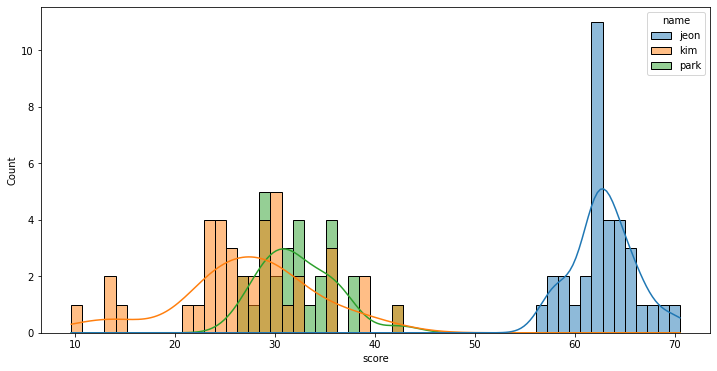

In [38]:
plt.figure(figsize = [12, 6])
sns.histplot(data = res, x = 'score', hue ='name', kde = True, bins = 55)